In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from HOTS.Monitor import DisplaySurface2D, GenerateAM, DisplayAM
from HOTS.STS import STS
from HOTS.Event import Event, Filters
from HOTS.Cluster import CustomKmeans

In [3]:
## Definition of the General parameters

In [4]:
tau = 0.02
R = 2
nb_cluster = 4
ImageSize = (32,32)

## Loading the events

In [5]:
image_list = [1, 32, 19, 22, 29]
event_L1 = Event(); F = Filters(event_L1)
address,time,polarity,event_nb = event_L1.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=image_list)
address_1,time_1,polarity_1,event_nb_1 = F.Neighbour(threshold=15, neighbourhood=2,image_size=(32,32))

chargement des images [1, 32, 19, 22, 29]


## Clustering the SpatioTemporal Surface with a Hierarchical Architecture

In [6]:
## Layer1

SpTe_Layer1= STS(tau=tau, R=R, ListPolarities=[-1,1],ImageSize=ImageSize,verbose=1)
Surface_Layer1 = SpTe_Layer1.create(event = event_L1)
ClusterLayer1 = CustomKmeans(nb_cluster = nb_cluster,verbose=1)
Prototype1 = ClusterLayer1.fit(SpTe_Layer1)
event_L2,_ = ClusterLayer1.predict(STS=SpTe_Layer1,event = event_L1)

## Layer2
SpTe_Layer2= STS(tau=10*tau, R=2*R, ListPolarities=[0,1,2,3],ImageSize=ImageSize,verbose=1)
Surface_Layer2 = SpTe_Layer2.create(event = event_L2)
ClusterLayer2 = CustomKmeans(nb_cluster = nb_cluster*2, verbose=1)
Prototype2 = ClusterLayer2.fit(SpTe_Layer2)
event_L3,_ = ClusterLayer2.predict(STS=SpTe_Layer2,event = event_L2)

## Layer3
SpTe_Layer3= STS(tau=10*10*tau, R=2*2*R, ListPolarities=[0,1,2,3,4,5,6,7],ImageSize=ImageSize,verbose=1)
Surface_Layer3 = SpTe_Layer3.create(event = event_L3)
ClusterLayer3 = CustomKmeans(nb_cluster = nb_cluster*2*2, verbose=1)
Prototype3 = ClusterLayer3.fit(SpTe_Layer3)
event_L4,_ = ClusterLayer3.predict(STS=SpTe_Layer3,event = event_L3)

Generation of SpatioTemporal Surface in ------ 1.01 s
Clustering SpatioTemporal Surface in ------ 1.64 s
Generation of SpatioTemporal Surface in ------ 1.33 s
Clustering SpatioTemporal Surface in ------ 2.21 s
Generation of SpatioTemporal Surface in ------ 3.11 s
Clustering SpatioTemporal Surface in ------ 6.68 s


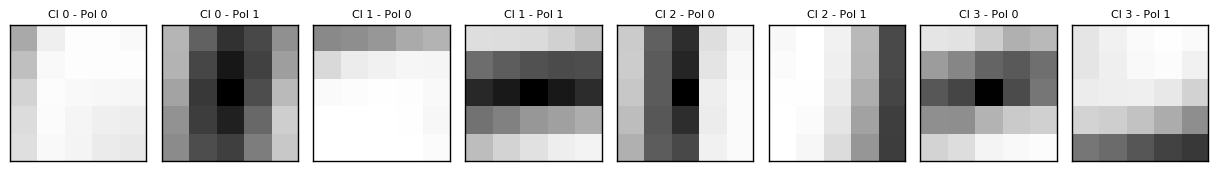

In [7]:
DisplaySurface2D(Prototype1,nb_polarities=2)

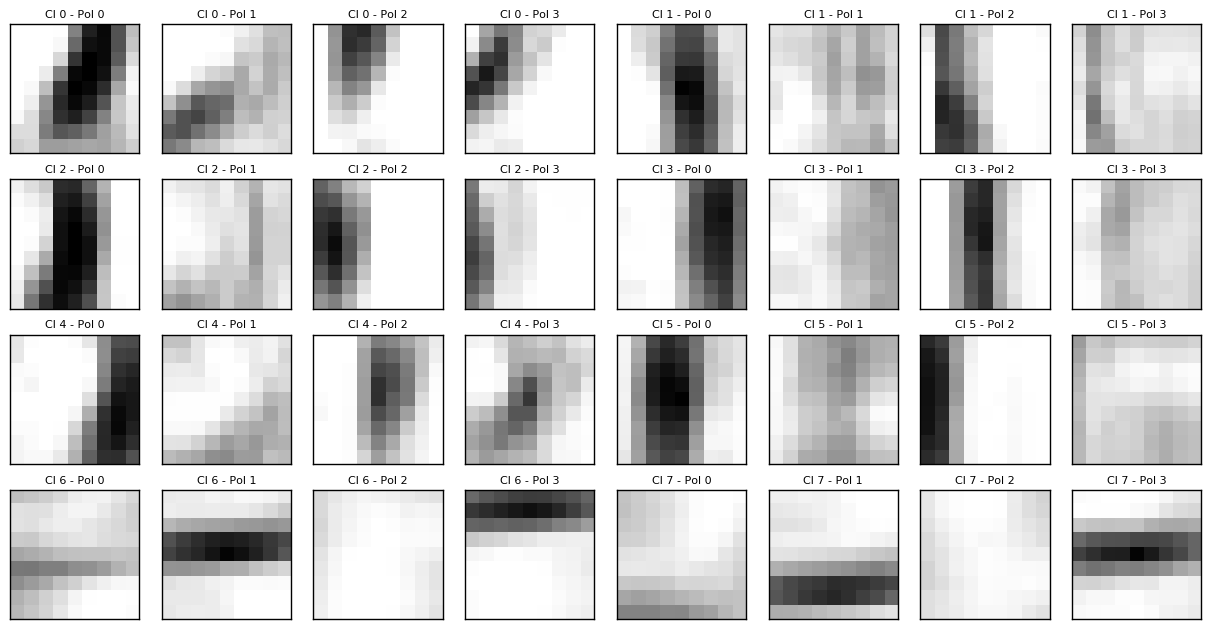

In [8]:
DisplaySurface2D(Prototype2,nb_polarities=4)

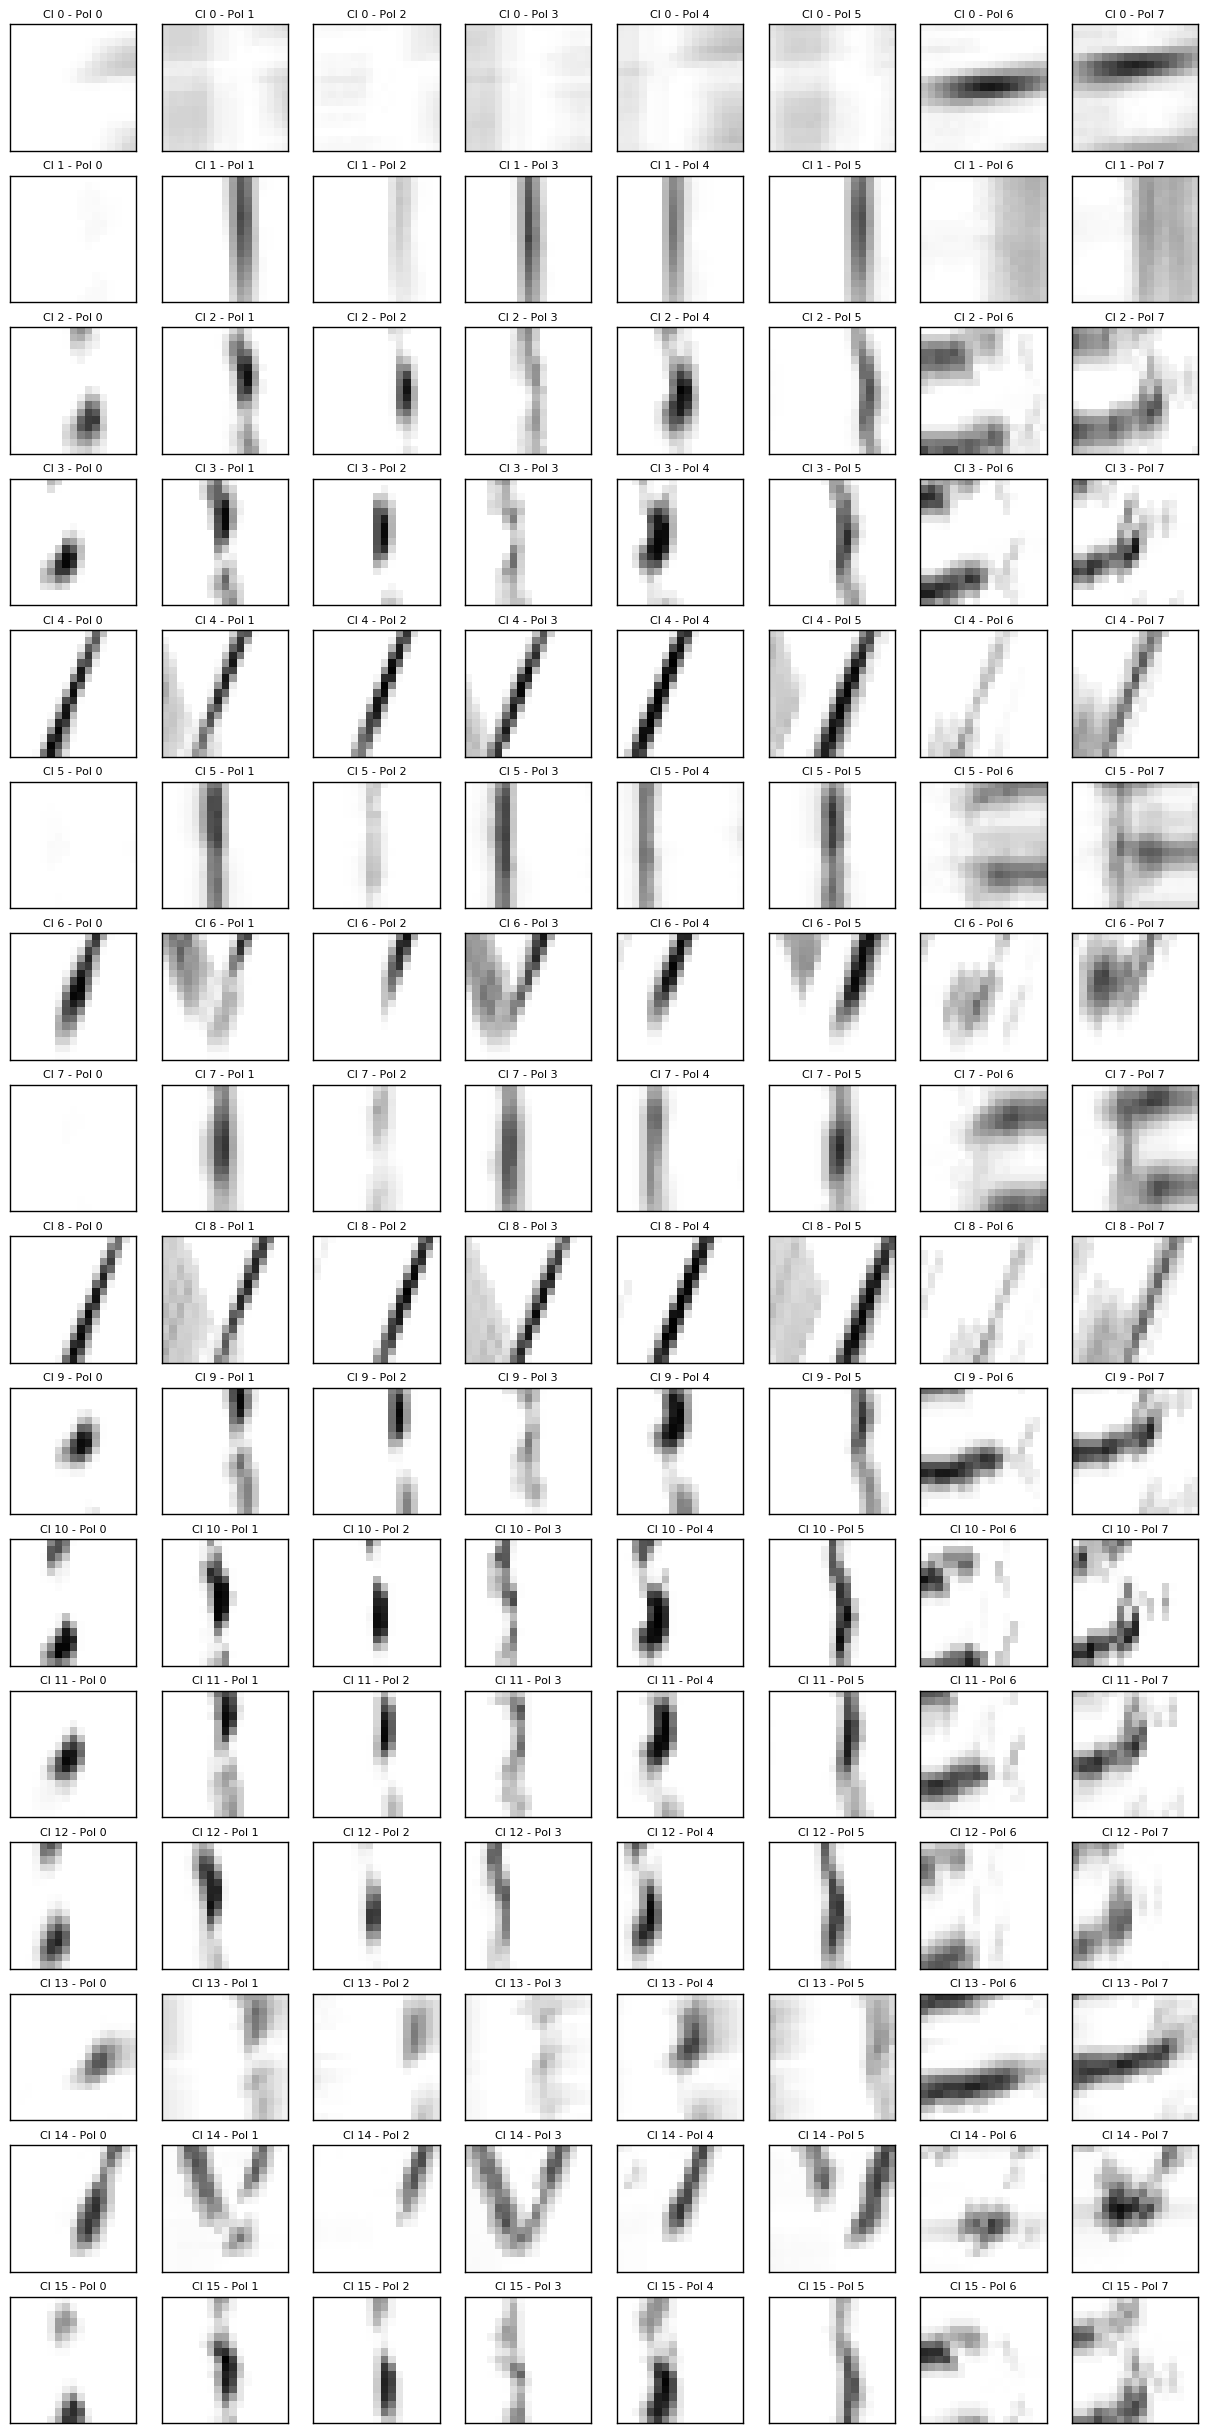

In [9]:
DisplaySurface2D(Prototype3,nb_polarities=8)

## Running the trained network on a single image

In [10]:
## Loading and filter an image of a 8
event_L1 = Event(); F = Filters(event_L1)
address,time,polarity,event_nb = event_L1.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
address_1,time_1,polarity_1,event_nb_1 = F.Neighbour(threshold=15, neighbourhood=2,image_size=(32,32))

## Layer1

SpTe_Layer1= STS(tau=tau, R=R, ListPolarities=[-1,1],ImageSize=ImageSize,verbose=0)
Surface_Layer1 = SpTe_Layer1.create(event = event_L1)
ClusterLayer1 = CustomKmeans(nb_cluster = nb_cluster,verbose=0)
Prototype1 = ClusterLayer1.fit(SpTe_Layer1)
event_L2,_ = ClusterLayer1.predict(STS=SpTe_Layer1,event = event_L1)

## Layer2
SpTe_Layer2= STS(tau=10*tau, R=2*R, ListPolarities=[0,1,2,3],ImageSize=ImageSize,verbose=0)
Surface_Layer2 = SpTe_Layer2.create(event = event_L2)
ClusterLayer2 = CustomKmeans(nb_cluster = nb_cluster*2, verbose=0)
Prototype2 = ClusterLayer2.fit(SpTe_Layer2)
event_L3,_ = ClusterLayer2.predict(STS=SpTe_Layer2,event = event_L2)

## Layer3
SpTe_Layer3= STS(tau=10*10*tau, R=2*2*R, ListPolarities=[0,1,2,3,4,5,6,7],ImageSize=ImageSize,verbose=0)
Surface_Layer3 = SpTe_Layer3.create(event = event_L3)
ClusterLayer3 = CustomKmeans(nb_cluster = nb_cluster*2*2, verbose=0)
Prototype3 = ClusterLayer3.fit(SpTe_Layer3)
event_L4,_ = ClusterLayer3.predict(STS=SpTe_Layer3,event = event_L3)

chargement des images [22]


#### Activation map for Layer1

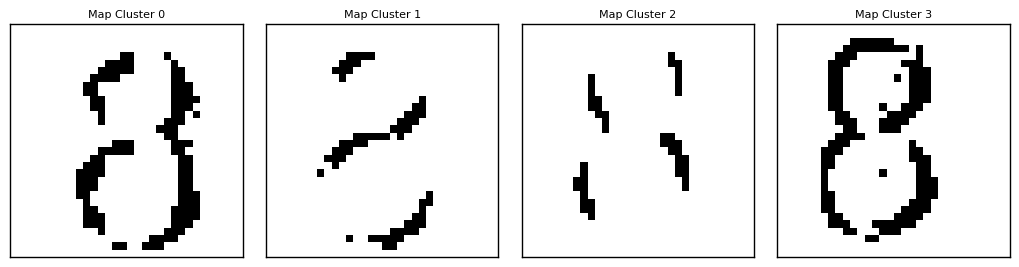

In [12]:
mapL1 = GenerateAM(event_L2,ClusterLayer1,ImageSize=ImageSize)
DisplayAM(mapL1)

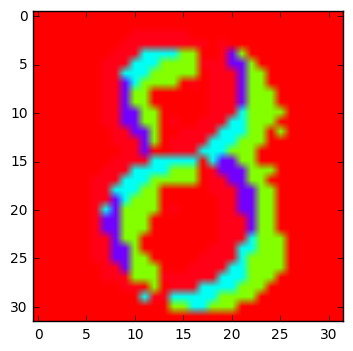

In [26]:
mapGlobal_L1 = GenerateAM(event_L2,ClusterLayer1,ImageSize=ImageSize,mode='global')
plt.imshow(mapGlobal_L1,cmap=plt.hsv())

#### Activation map for Layer2

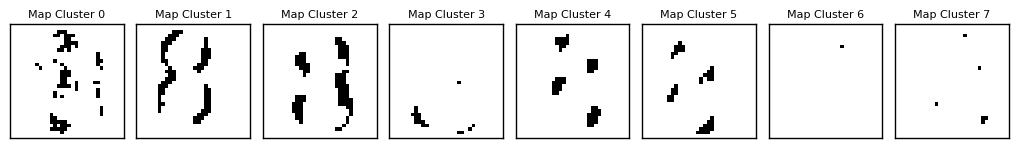

In [27]:
mapL2 = GenerateAM(event_L3,ClusterLayer2,ImageSize=ImageSize)
DisplayAM(mapL2)

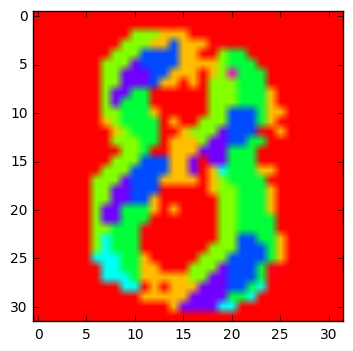

In [28]:
mapGlobal_L2 = GenerateAM(event_L3,ClusterLayer2,ImageSize=ImageSize,mode='global')
plt.imshow(mapGlobal_L2,cmap=plt.hsv())

#### Activation map for Layer3

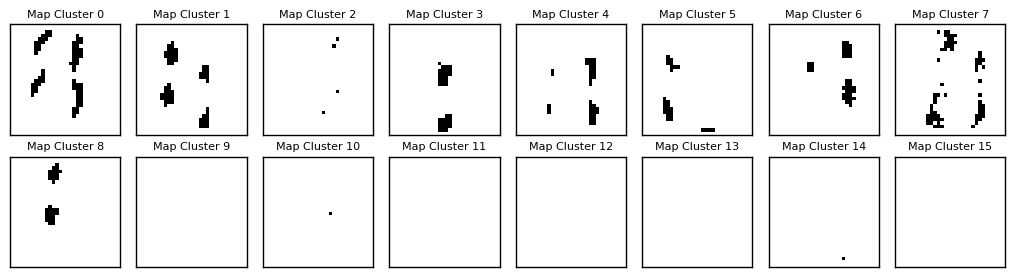

In [29]:
mapL3 = GenerateAM(event_L4,ClusterLayer3,ImageSize=ImageSize)
DisplayAM(mapL3)

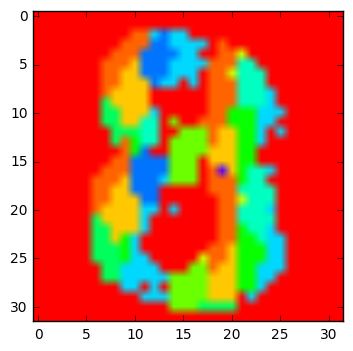

In [30]:
mapGlobal_L3 = GenerateAM(event_L4,ClusterLayer3,ImageSize=ImageSize,mode='global')
plt.imshow(mapGlobal_L3,cmap=plt.hsv())